 TP  noté 1 Groupe 3B : Les villes de Normandie
 =====

1 - Introduction 
------


L’objectif de ce TP est de faire une synthèse des notions abordées dans les précédents TP.

Le TP sera à réaliser en python 3. Les librairies utilisées sont installées sur les machines de l'université, vous pouvez néanmoins les installer sur vos propres machines à l'aide de l'utilitaire pip présent par défaut avec python.
	
**<span style="color:red"> À part si cela est précisé, vous ne devez pas utiliser directement de boucle (`for`,`while`) ou de branchement conditionnel (`if`) durant ce TP.</span>.**

**<span style="color:red"> 
Ce TP sera noté. Vous rendrez le code que vous avez réalisé en fin de séance sur la plateforme ecampus. N’oubliez pas de mettre votre nom et votre numéro d’étudiant dans les commentaires du fichier. Vous rendrez également un compte-rendu de TP où vous présenterez ce que vous avez fait et répondrez aux questions du TP. Vous mettrez le plus d’images possible pour illustrer vos explications. Ce rapport est à rendre sur ecampus dans un délai d’une semaine. Aucun rendu par mail n’est accepté.</span>**

**<span style="color:blue"> Ce sujet utilise des générateurs aléatoires. Il est donc normal que vous n'obteniez pas exactement les même valeurs que les exemples de résultat donnée.</span>**

In [38]:
import numpy as np
import scipy as sc
import scipy.spatial
import matplotlib.pyplot as plt
import pickle

2 - Chargement et prétraitement des données
---

Lisez le fichier `coord_villes.npy` dans une variable `coord`. Vous aurez les coordonnées des villes de Normandie selon deux axes.

In [39]:
coord=np.load('coord_villes.npy')

Affichez ces villes en bleu sur une figure. Affichez Carentan(665) en rouge ,et  Caen(4), Alençon (1218), Rouen(2297), Saint-lô(751), Evreux(1712) en couleur "chartreuse".!

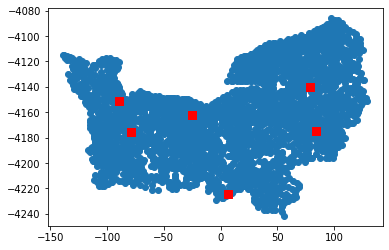

In [40]:
#color "la couleur de notre point ou ville"
#marker "la forme de le point qu'on veut affiché" 
#alpha "cest la valeur de fusion comprise entre 0(transparent) et 1(opaque)"
plt.scatter(coord[:,0],coord[:,1])
plt.scatter(coord[665,0],coord[665,1], color='r',marker='s',s=50,alpha=1)
plt.scatter(coord[4,0],coord[4,1], color='r',marker='s',s=50,alpha=1)
plt.scatter(coord[1218,0],coord[1218,1], color='r',marker='s',s=50,alpha=1)
plt.scatter(coord[2297,0],coord[2297,1], color='r',marker='s',s=50,alpha=1)
plt.scatter(coord[751,0],coord[51,1], color='r',marker='s',s=50,alpha=1)
plt.scatter(coord[1712,0],coord[1712,1], color='r',marker='s',s=50,alpha=1)
plt.show()

Calculez la distance euclidienne entre toutes les villes de Normandie. Le résultat sera sous la forme d'une matrice `dist` dont les coordonnées $i,j$ donne la distance entre la ville $i$ et la ville $j$.

In [41]:
m = sc.spatial.distance.pdist(coord, 'euclidean')
dist = sc.spatial.distance.squareform(m)
print(dist)

[[  0.          12.10277222  13.82309128 ... 181.34686312 171.42639059
  159.19205588]
 [ 12.10277222   0.           3.8971987  ... 170.33084076 160.53971205
  148.58008512]
 [ 13.82309128   3.8971987    0.         ... 170.8573325  161.17219084
  149.41680936]
 ...
 [181.34686312 170.33084076 170.8573325  ...   0.          10.75232354
   25.15269187]
 [171.42639059 160.53971205 161.17219084 ...  10.75232354   0.
   14.45313695]
 [159.19205588 148.58008512 149.41680936 ...  25.15269187  14.45313695
    0.        ]]


Carentan est la ville d'indice 665. Récupérez les indices des 50 villes les plus proches de Carentan.!

In [42]:
indice_Carentan = 665

In [45]:
indices_caran = np.argsort(indice_Carentan)
coord_proche_Carentan=coord[indices[1:11]]
coord_proche_Carentan

NameError: name 'indices' is not defined

Définissez les variables `coord_proche_Carentan` et `dist_proche_Carentan` contenant respectivement les coordonnées des 50 villes les plus proches de Carentan et les distances entre toutes ces villes. 

In [46]:
indices_caran = np.argsort(dist_carentan)
coord_proche_Carentan=coord[indices[1:51]]

dist_proche_Carentan=sc.spatial.distance.squareform(sc.spatial.distance.pdist(coord_proche_Carentan, 'euclidean'))

print("coord_proche_Carentan",coord_proche_Carentan)
print("dist_proche_Carentan",dist_proche_Carentan)

NameError: name 'dist_carentan' is not defined

Affichez sur une figure les 50 villes les plus proches de Carentan en bleu et la ville de Carentan en rouge.![texte alternatif](Carentan_50voisine.png)


In [77]:
dist_carentan = dist[665]
indices_caran = np.argsort(dist_carentan)
villes_proche=coord[indices[1:51]]
villes_eloigne= np.argsort(dist_rouen)[-1: -51:-1]


dist_Rouen = dist[indice_Rouen]
indices_caran = np.argsort(dist_Rouen)
print(coord[indices_caran[1:41]])


dist_rouen = dist[ville['Rouen']]
#indices_rouen = np.argsort(dist_rouen)[-1: -51:-1]
#indices_caen = np.argsort(dist_caen)[1:51]


plt.scatter(coord_xyz[:,0],-coord_xyz[:,1],color='b');

#plt.scatter(coord_xyz[ville['Caen'], 0],-coord_xyz[ville['Caen'],1], color='green');
#plt.scatter(coord_xyz[ville['Rouen'], 0],-coord_xyz[ville['Rouen'],1],color='y');

                  
#plt.scatter(coord_xyz[indices_rouen, 0],-coord_xyz[indices_rouen,1],color='red');
#plt.scatter(coord_xyz[indices_caen, 0],-coord_xyz[indices_caen,1],color='black');

plt.show()

NameError: name 'dist_rouen' is not defined

3 - Visualition d'un propagation
---

Nous allons dans ce TP visualiser la propagation d'un phénomène entre les villes proches de Carentan.

Tirez 5 entiers entre 0 et 50 non compris que vous placerez dans un tableau nommée `i_villes_src`.
Numéro de villes choisies:  [ 7 37 15 35  4]

In [ ]:
i_villes_src=np.random.randint(1, 50, 5)
print(i_villes_src)

In [ ]:
ville_src = np.eye(50)

Définissez un variable $s$ égale à 4. Vous pourrez changer par la suite cette valeur pour accélérer ou ralentir la propagation.

In [ ]:
s=4

Multipliez les valeurs de la matrice `villes_choisie_propagation` par $s$ pour fixer la vitesse de propagation. 

In [ ]:
def affichediffusion(villes_apres_propagation,legende):
    plt.figure(figsize=(15,15))
    plt.imshow(villes_apres_propagation,cmap='gray')
    plt.title(legende)
    # Affichage de la grille
    ax = plt.gca()
    ax.set_xticks(np.arange(0, 50))
    ax.set_yticks(np.arange(0, 50))
    ax.set_xticks(np.arange(-.5, 50, 1), minor=True);
    ax.set_yticks(np.arange(-.5, 50, 1), minor=True);
    ax.set_xticklabels(np.arange(50))
    ax.set_yticklabels(np.arange(50))
    plt.grid(which='minor')
    plt.show()


Déclarez une variable `villes_apres_propagation2` qui est égale `villes_apres_propagation` auquel on soustrait une matrice identité de même dimension.  en utilisant la fonction affichediffusion, afficher la matrice villes_apres_propagation2. ![texte alernatif](3B_villes_apres_propagation2.png)

En utilisant la matrice`ville_src`et `villes_apres_propagation2`, construisez une matrice g semblable à `villes_apres_propagation2` dont seul les lignes correspondant aux villes sources contiennent des valeurs différentes de 0. en utilisant la fonction affichediffusion, afficher la matrice g.![texte alernatif](3B_g.png)

Construisez un vecteur `villes_dest` recensant toutes les villes destinations. Ce vecteur contiendra True aux positions des villes destinations et False pour les autres. Pour répondre, vous utiliserez notamment une sommation bien choisie sur la matrice précédente.

Affichez avec des carrés bleus les 50 villes proches de Carentan, avec des ronds rouges les villes sources et avec des carrés verts les villes destinations. Un affichage qui répond aux contraintes précédentes et qui ne serait pas exactement similaire au rendu du sujet, convient parfaitement. ![texte alernatif](3B_diffusion_1.png)

4 - Graphe de propagation
---

L'objectif de cette partie est de visualiser dans quel sens se font les propagations. Nous souhaitons créé un graphe permettant de visualiser avec des flèches les villes sources et destinations de nos propagations. 

Créez un vecteur de valeurs de 0 à 50 non compris que vous nommerez `noeuds`. Ce vecteur liste les numéros de villes.

Créez une matrice de la même taille que `g` indiquant les noeuds sources possible. Vous nommerez cette matrice `a`.

Redimensionnez la matrice précédente pour ne garder que les lignes et 2 colonnes. Vous nommerez cette matrice `i_noeuds`.

En utilisant la matrice précédente. Faites une liste de tout les propagations. La première colonne indique le numéro de la ville source et la deuxième colonne le numéro de la ville destination. Vous nommerez cette matrice `fleches`.

A votre avis que fait la fonction suivante ? 

In [ ]:
def printGraph(coord,fleches,villes_src):
    plt.figure(figsize=(15,15))
    ax = plt.axes()
        
    ax.axis('equal')
    ax.quiver(coord[fleches[:,0],0], 
              coord[fleches[:,0],1],
              coord[fleches[:,1],0]-coord[fleches[:,0],0],
              coord[fleches[:,1],1]-coord[fleches[:,0],1],
              scale=1.1, units='xy',
              headwidth = 7
    )
    
    ax.scatter(coord[:,0],coord[:,1],s=100)
    ax.scatter(coord[villes_src,0],coord[villes_src,1],s=100,color='r')
    plt.show()

Utilisez la fonction précédente avec les données du TP. ![texte alternatif](3B_diffusion2.png)

Question bonus: Mixez les deux types d'affichage utilisé dans ce TP pour obtenir l'affichage suivant: